# **GRUPO 1**: Lucía Chicharro, María Montero, Patricia Ramos y Lydia Sánchez-Cano.


# **Redes de neuronas convolucionales.**

El objetivo es crear un modelo de Red de Neuronas Convolucionales que sea capaz de reconocer y clasificar imágenes de ropa en sus diferentes tipologías. Este modelo será definido, configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.

Para ello crearemos un modelo en Keras aplicando de una tirada todos los pasos al conjunto de datos Fashion-MNIST.Fashion-MNIST es un conjunto de datos de las imágenes de los artículos de Zalando, una tienda de moda online alemana especializada en ventas de ropa y zapatos. El conjunto de datos contiene 70K imágenes en escala de grises en 10 categorías. Estas imágenes muestran prendas individuales de ropa en baja resolución (28 x 28 píxeles).

La clasificación la haremos según la siguiente tabla:

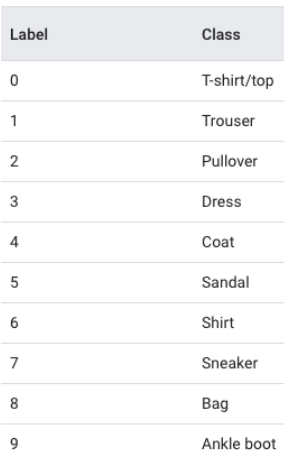

In [ ]:
# IMPORTAMOS KERAS
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.9.2


Cargamos el conjunto de datos que vamos a utilizar.

In [ ]:
# CARGAMOS EL CONJUNTO DE DATOS Fashion_MNIST EN KERAS
# fashion-mnist = tf.keras.datasets.fashion_mnist
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images y train_labels son las imágenes y las etiquetas que vamos a usar como conjunto de entrenamiento.

En el caso de test_images, test_labels , hacen referencia a las imágenes y las etiquetas de test que se usarán cuando el modelo ya esté entrenado.

In [ ]:
print(train_images.shape)

(60000, 28, 28)


Como ya sabíamos, utilizamos 60000 imágenes de entramiento de 28*28 píxeles.

In [ ]:
print(test_images.shape)

(10000, 28, 28)


En el caso de las imágenes de test, tenemos 10000 imágenes de 28*28 píxeles.

In [ ]:
# Vemos la matriz de la imagen número 40.000 (28x28)

np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[40000]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [ ]:
# La imagen anterior corresponde con la categoría 7, que es un zapato como podíamos ver anteriormente.
train_labels[40000]

7

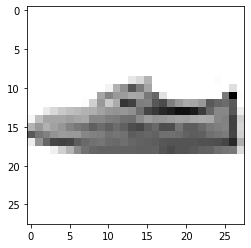

In [ ]:
# Veamos el elemento 40000 de las imágenes de entrenamiento y pintémoslo con matplotlib

digit = train_images[40000]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

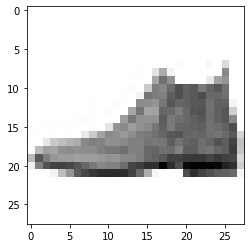

In [ ]:
#Veamos el elemento de la posición 0 de las imágenes de test y pintémoslo con matplotlib (debe pertener a la categoría 9 que son botines)

digit = test_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

**CONSTRUIMOS LA RED DE NEURONAS CONVOLUCIONALES**

*Preparamos los datos*

Para que nuestra red converja más fácilmente, normalizaremos los datos de entrenamiento y de test evitando así que sean heterogéneos de rango. Convertiremos nuestros datos en una matriz `float32` de la forma `(60000, 28 * 28)` que toma valores en `[0,1]`

In [ ]:
train_images = train_images.reshape((60000, 28,28,1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28,28,1))
test_images = test_images.astype('float32') / 255

print (train_images.shape)
print (train_labels.shape)

(60000, 28, 28, 1)
(60000,)


Como la función de pérdida en todos los casos será `sparse_categorical_crossentropy`, no codificaremos las etiquetas usando el one-hot encoding.

***Caso 1***


In [ ]:
# Crear el Modelo de red neuronal CNN con:

# La red será secuencial (de la entrada a la salida sin ciclos).
model = Sequential()
#En la primera capa convolucional hay 32 filtros , el tamaño de la ventana es de 5x5 y la función de activación relu.
model.add(Conv2D(32, (5, 5), activation='relu',input_shape=(28,28,1)))
#La de pooling correspondiente es de 2x2
model.add(MaxPooling2D((2, 2)))
# En la segunda capa convolucional hay 64 filtros,el tamaño de la ventana es de 5x5 y la función de activación es relu.
model.add(Conv2D(64, (5, 5), activation='relu'))
# La de pooling correspondiente es de 2x2
model.add(MaxPooling2D((2, 2)))
#Capa Flatten
model.add(Flatten())
# Como tenemos 10 categorías, la última capa tiene que tener 10 neuronas y la función de activación debe ser
# softmax ya que queremos que nos devuelva una distribución de probabilidad sobre las 10 clases.
model.add(Dense(10, activation='softmax'))

# Resultado del summary:
#832=((5x5)+1)x32 (filtros)
#51264=((25x32)+1)x64 (filtros)
#10250=1024(capa Flatten aplana (4x4x64)) x10 + 10(cada bias)
# 832+51264+10250=62346(total de parámetros entrenables)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 1024)              0         
                                                                 
 dense_8 (Dense)             (None, 10)               

El siguiente paso es definir la función de activación , de pérdida y la métrica.

In [ ]:
#Compilamos el modelo
model.compile(loss='sparse_categorical_crossentropy', #la función de pérdida 
              optimizer='sgd',# cargamos el optimizador 'sgd' (Stocastic Gradient Descendent)
              metrics=['accuracy']) # la métrica es 'accuracy': Solo tendremos en cuenta la fracción de imágenes que son
                                    # correctamente clasificadas 


Ahora sí podemos entrenar la red.

In [ ]:
# Ejecutamos el entrenamiento 
# epochs: Épocas:"una pasada sobre todo el conjunto de datos",separara el entrenamiento en distintas fases para el registro y la evaluación periódica.
#En cada iteración, la red calculará los gradientes de los pesos y ajustará los pesos 
#Al final de las iteraciones veremos que la red es capaz de clasificar las
model.fit(train_images, train_labels,epochs=5)
#Verificamos el modelo ya entrenado contra el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8183 - accuracy: 0.7130
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5133 - accuracy: 0.8162
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4472 - accuracy: 0.8420
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4097 - accuracy: 0.8544
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3910 - accuracy: 0.8628
Test accuracy: 0.8628000020980835


En nuestros datos de entrenamiento, obtenemos una pérdida de un 39% y una precisión de un 86% aproximadamente.

En el caso de nuestro conjunto de prueba,la pérdida ha aumentado ligeramente (obtenemos un 39,10% aproximadamente) y la precisión ha disminuido ( obtenemos una precisión de un 86,28% aproximadamente).

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

  

313/313 [==============================] - 1s 2ms/step


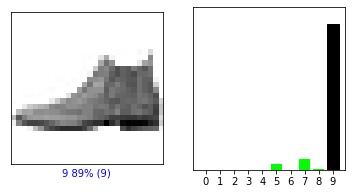

<Figure size 432x288 with 0 Axes>

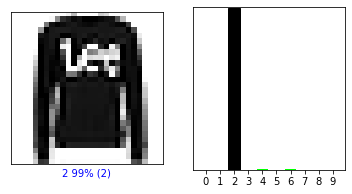

<Figure size 432x288 with 0 Axes>

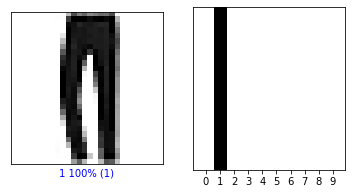

<Figure size 432x288 with 0 Axes>

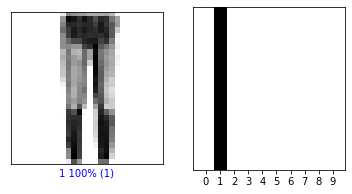

<Figure size 432x288 with 0 Axes>

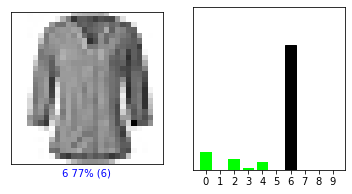

<Figure size 432x288 with 0 Axes>

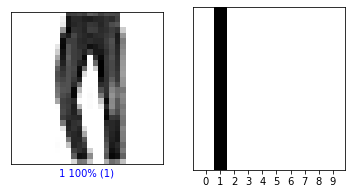

<Figure size 432x288 with 0 Axes>

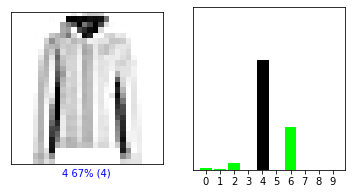

<Figure size 432x288 with 0 Axes>

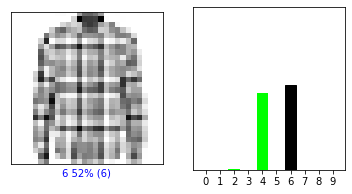

<Figure size 432x288 with 0 Axes>

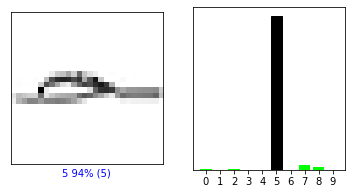

<Figure size 432x288 with 0 Axes>

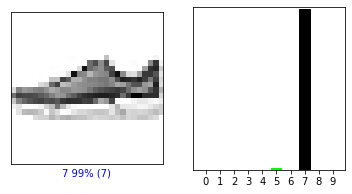

<Figure size 432x288 with 0 Axes>

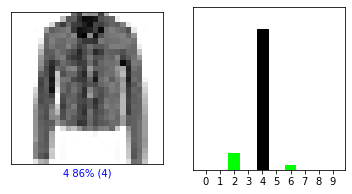

<Figure size 432x288 with 0 Axes>

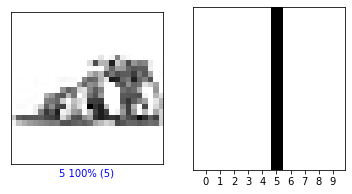

<Figure size 432x288 with 0 Axes>

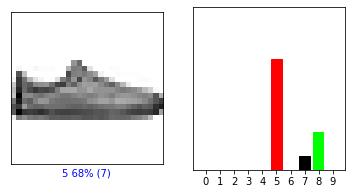

<Figure size 432x288 with 0 Axes>

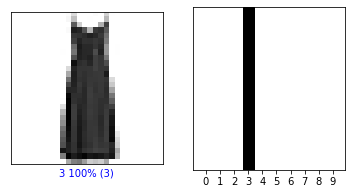

<Figure size 432x288 with 0 Axes>

In [ ]:
# graficamos los 14 primeros elementos para ver cómo de bien o de mal se comporta nuestro modelo.

predictions = model.predict(test_images)

for i in range(14):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

Comentarios sobre las imágenes:

En este caso, todas las imágenes son clasificadas correctamente excepto la penúltima.Sin embargo, cabe destacar que el error se debe al tipo de zapato pero no confunde un zapato con otro tipo de prenda.


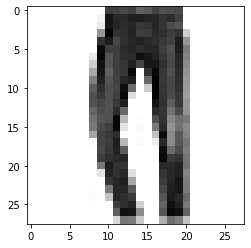

In [ ]:
# Veamos el sexto elemento
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

digit = test_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Generaremos una predicción sobre este elemento.

In [ ]:

print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(predictions[5])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(np.argmax(predictions[5]))

=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
1


Con un 100% nuestro modelo clasifica correctamente la sexta imagen.

*Conclusiones caso 1:* 

Pese a que hemos obtenido unos datos de pérdida y precisión bastante razonables, es cierto que podemos mejorarlos modificando los hiperparámetros.

**Caso 1: 25 épocas**.

Veamos qué ocrurre con el mismo modelo anterior solo que entrenado con 25 épocas.


In [ ]:
#Normalizamos los datos
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28,28,1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28,28,1))
test_images = test_images.astype('float32') / 255

In [ ]:
# Ejecutamos el entrenamiento 
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(train_images, train_labels,epochs=25)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Epoch 1/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3693 - accuracy: 0.8680
Epoch 2/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3552 - accuracy: 0.8752
Epoch 3/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3429 - accuracy: 0.8783
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3327 - accuracy: 0.8820
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3223 - accuracy: 0.8854
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3140 - accuracy: 0.8885
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3066 - accuracy: 0.8913
Epoch 8/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2988 - accuracy: 0.8940
Epoch 9/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2931 - accuracy: 0.8958
Epoch 10/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.285

Para los datos de entrenamiento,obtenemos una precisión de un 92% y una pérdida del 22% aproximadamente.
Al compararlo con los datos de prueba, vemos que la pérdida aumenta hasta un 28% y una precisión de un 90% aproximadamente.

313/313 [==============================] - 1s 2ms/step


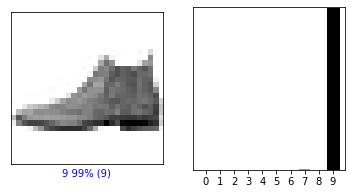

<Figure size 432x288 with 0 Axes>

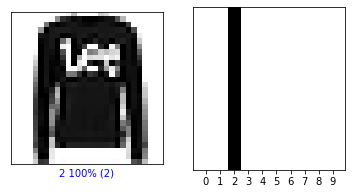

<Figure size 432x288 with 0 Axes>

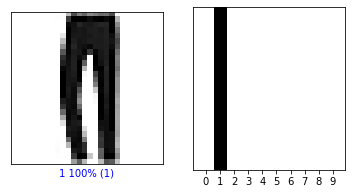

<Figure size 432x288 with 0 Axes>

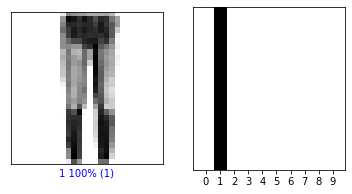

<Figure size 432x288 with 0 Axes>

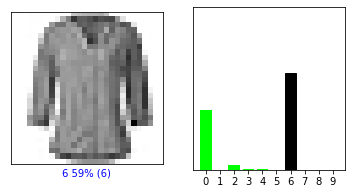

<Figure size 432x288 with 0 Axes>

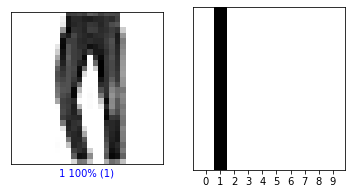

<Figure size 432x288 with 0 Axes>

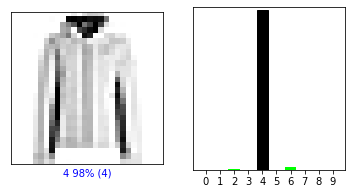

<Figure size 432x288 with 0 Axes>

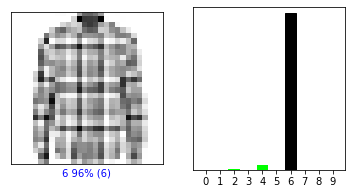

<Figure size 432x288 with 0 Axes>

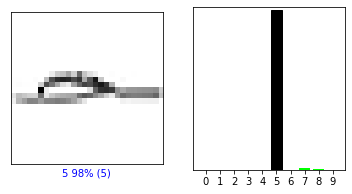

<Figure size 432x288 with 0 Axes>

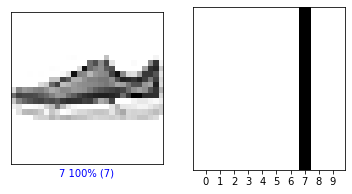

<Figure size 432x288 with 0 Axes>

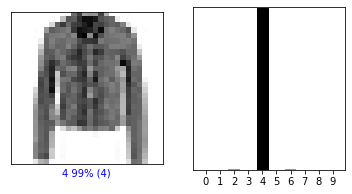

<Figure size 432x288 with 0 Axes>

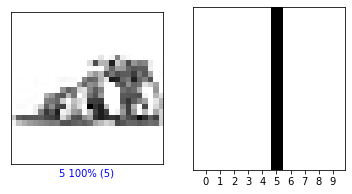

<Figure size 432x288 with 0 Axes>

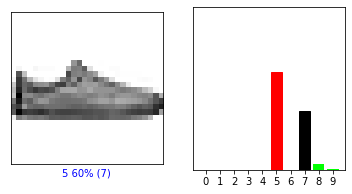

<Figure size 432x288 with 0 Axes>

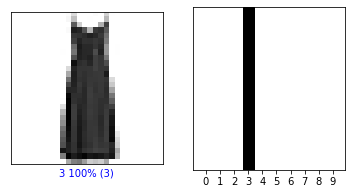

<Figure size 432x288 with 0 Axes>

In [ ]:
predictions = model.predict(test_images)

for i in range(14):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

Comentarios sobre las imágenes:

Volvemos a obtener resultados semejantes a los del caso anterior. La mayoría de las imágenes son clasificadas correctamente y con porcentajes bastante altos, excepto la penúltima del zapato.

In [ ]:

print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(predictions[5])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(np.argmax(predictions[5]))

=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
1


El modelo clasifica correctamente la imagen con un 100%.

*Conclusiones caso 1 (25 épocas):*
Vemos que al añadir 20 épocas más,tanto la precisión como la pérdida que hemos obtenido ahora son mucho mejores que en el caso de no añadir esas épocas.

**Caso 1: usamos tanh como función de activación**

En lugar de usar como función de activación `relu` , usaremos `tanh`.

In [ ]:
#Normalizamos los datos
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28,28,1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28,28,1))
test_images = test_images.astype('float32') / 255

In [ ]:
# Crear el Modelo de red neuronal CNN con:


#Los datos vuelven a ser los mismos, solo hemos cambiado la función de activación.
model_1= Sequential()

model_1.add(Conv2D(32, (5, 5), activation='tanh',input_shape=(28,28,1)))
model_1.add(MaxPooling2D((2, 2)))

model_1.add(Conv2D(64, (3, 3), activation='tanh'))
model_1.add(MaxPooling2D((2, 2)))

model_1.add(Flatten())
model_1.add(Dense(65, activation='relu'))
model_1.add(Dense(10, activation='softmax'))

model_1.summary()
#832=((5x5)+1)x32 (filtros)
#18.496=((9x32)+1)x64 (filtros)
#104.065=((5x5x64)x65)+65
#660=(65x10)+10
#Total de parámetros=832+18.496+104.065+660=124.053

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1600)              0         
                                                                 
 dense_9 (Dense)             (None, 65)               

In [ ]:
#Compilamos el modelo
model_1.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Ejecutamos el entrenamiento 
model_1.fit(train_images, train_labels,epochs=5)
test_loss, test_acc = model_1.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7675 - accuracy: 0.7240
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4813 - accuracy: 0.8227
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4195 - accuracy: 0.8480
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3866 - accuracy: 0.8608
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.3765 - accuracy: 0.8643
Test accuracy: 0.864300012588501


Para los datos de entrenamiento, obtenemos una precisión de un 87% y una pérdida de un 36% aproximadamente.

Al validarlo en nuestro conjunto de prueba,obtenemos una pérdida de un 38% y una precisión de un 86% aproximadamente.

313/313 [==============================] - 1s 2ms/step


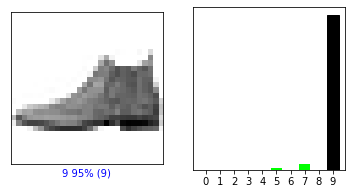

<Figure size 432x288 with 0 Axes>

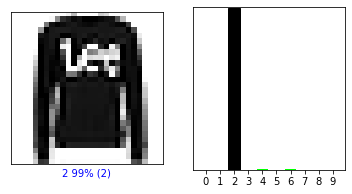

<Figure size 432x288 with 0 Axes>

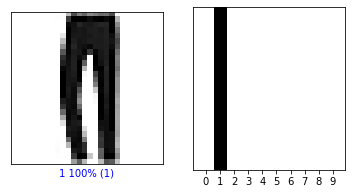

<Figure size 432x288 with 0 Axes>

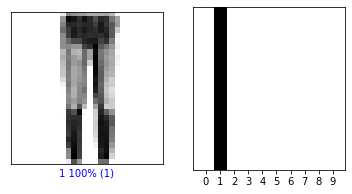

<Figure size 432x288 with 0 Axes>

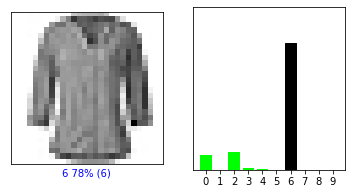

<Figure size 432x288 with 0 Axes>

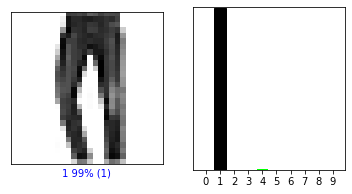

<Figure size 432x288 with 0 Axes>

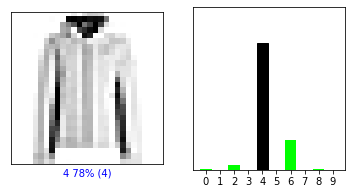

<Figure size 432x288 with 0 Axes>

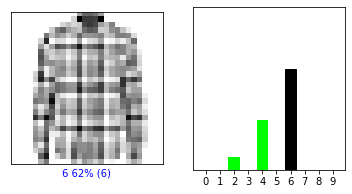

<Figure size 432x288 with 0 Axes>

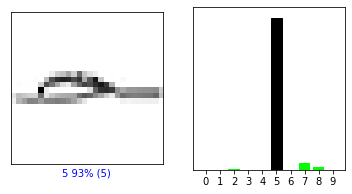

<Figure size 432x288 with 0 Axes>

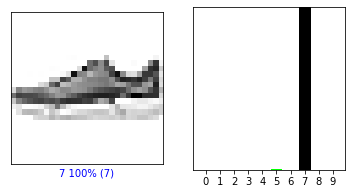

<Figure size 432x288 with 0 Axes>

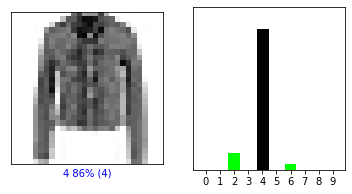

<Figure size 432x288 with 0 Axes>

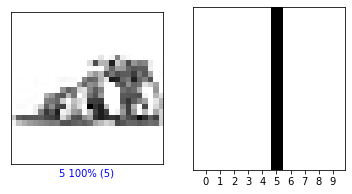

<Figure size 432x288 with 0 Axes>

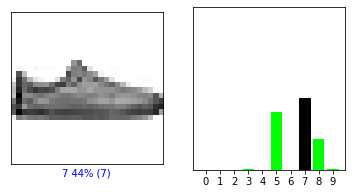

<Figure size 432x288 with 0 Axes>

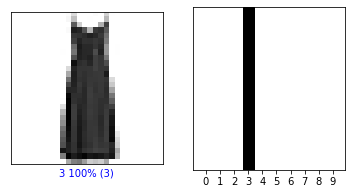

<Figure size 432x288 with 0 Axes>

In [ ]:

predictions= model_1.predict(test_images)

for i in range(14):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

Comentarios sobre las imágenes:

En este caso, todas las imágenes son clasificadas correctamente.

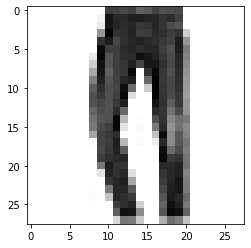

In [ ]:
# Veamos el sexto elemento
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

digit = test_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:

print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(predictions[5])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(np.argmax(predictions[5]))

=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
[0.   0.99 0.   0.   0.   0.   0.   0.   0.   0.  ]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
1


El modelo clasifica correctamente la imágen con un 99%.

*Conclusiones caso 1 (`tanh`):*

Tras implementar la función de activación `tanh` hemos obtenidos datos algo peores que al aplicar la función de ativación `relu`. Sin embargo, es notable que al aplicar la función de activación `relu` y 25 épocas es cuando hemos obtenido los mejores datos de precisión y pérdida.

***Caso 2***

In [ ]:
#Normalizamos los datos
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28,28,1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28,28,1))
test_images = test_images.astype('float32') / 255

In [ ]:
# Crear el Modelo de red neuronal CNN con:
model1= Sequential()
#El número de filtros de la primera capa convolucional es 64 , el tamaño de la ventana 7x7 y la función de activación relu.
model1.add(Conv2D(64, (7, 7), activation='relu',input_shape=(28,28,1),padding='same'))#queremos obtener un tensor de salida
#La capa de pooling correspondiente es de 2x2                                        #de las mismas dimensiones que la entrada (se añaden tantas filas y columnas de ceros como sean necesarias)
model1.add(MaxPooling2D((2, 2)))
#El número de filtros de la segunda capa convolucional son 128, el tamaño de la ventana es 3x3 y la función de activación es relu.
model1.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
#La ventana de pooling correspondiente es de 2x2
model1.add(MaxPooling2D((2, 2)))

model1.add(Flatten())
#La primera capa Dense es de 65 neuronas y de función de activación relu.
model1.add(Dense(65, activation='relu'))
#La última capa tiene 10 nueronas y función de activación softmax.
model1.add(Dense(10, activation='softmax'))

model1.summary()
#3.200=((7x7)+1)x64
#73.856=((9x64)x128)+padding
#407.745=(7x7x128)x65+65
#660=65x10+10
#485.461=3.200+73.856+407.745+660 (total de parámetros entrenables)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 6272)              0         
                                                                 
 dense_13 (Dense)            (None, 65)               

In [ ]:
#Compilamos el modelo
model1.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Ejecutamos el entrenamiento 
model1.fit(train_images, train_labels,epochs=5)
test_loss, test_acc = model1.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7921 - accuracy: 0.7131
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5111 - accuracy: 0.8148
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4349 - accuracy: 0.8446
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3952 - accuracy: 0.8575
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3741 - accuracy: 0.8665
Test accuracy: 0.8665000200271606


Para los datos de entrenamiento, obtenemos una pérdida de un 36% y una precisión de un 87% aproximadamente.

Al validarlo en nuestro conjunto de prueba, obtenemos una pérdida de un 37% y una precisión de un 86%.

313/313 [==============================] - 1s 2ms/step


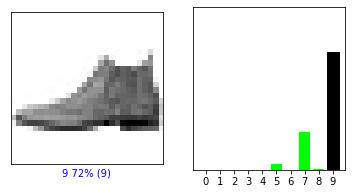

<Figure size 432x288 with 0 Axes>

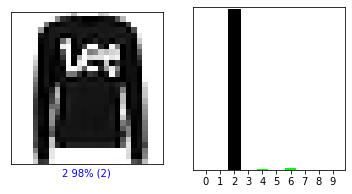

<Figure size 432x288 with 0 Axes>

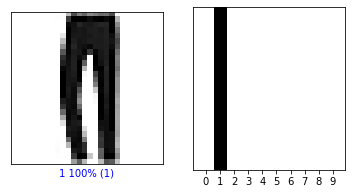

<Figure size 432x288 with 0 Axes>

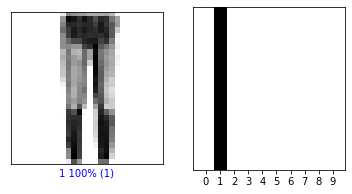

<Figure size 432x288 with 0 Axes>

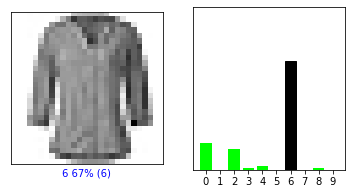

<Figure size 432x288 with 0 Axes>

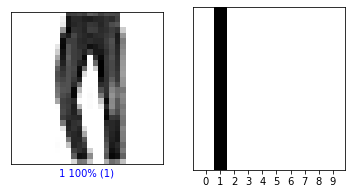

<Figure size 432x288 with 0 Axes>

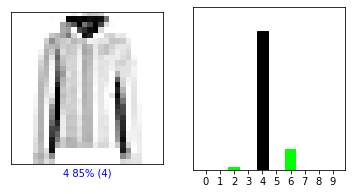

<Figure size 432x288 with 0 Axes>

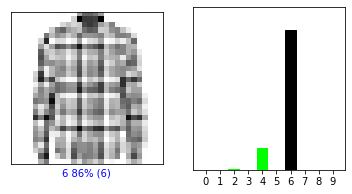

<Figure size 432x288 with 0 Axes>

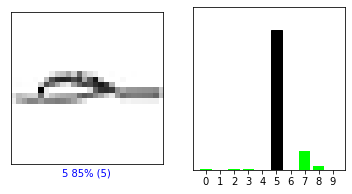

<Figure size 432x288 with 0 Axes>

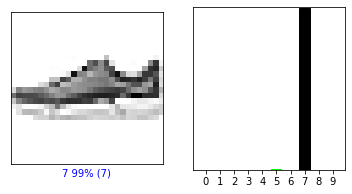

<Figure size 432x288 with 0 Axes>

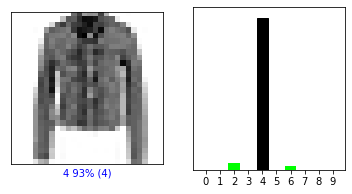

<Figure size 432x288 with 0 Axes>

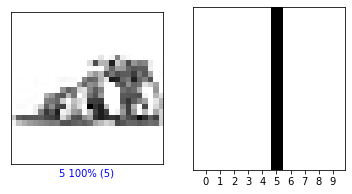

<Figure size 432x288 with 0 Axes>

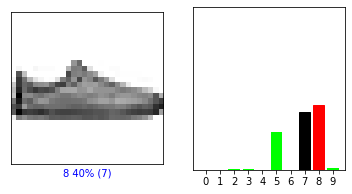

<Figure size 432x288 with 0 Axes>

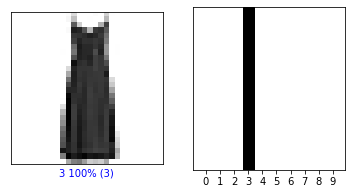

<Figure size 432x288 with 0 Axes>

In [ ]:

predictions= model1.predict(test_images)

for i in range(14):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

Comentarios sobre las imágenes: 

Se puede observar que el modelo clasifica correctamente todas las imágenes con porcentajes bastante altos,excepto la penúltima.

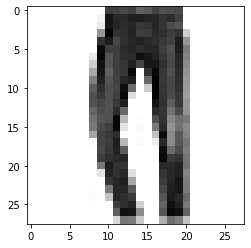

In [ ]:
# Veamos el sexto elemento
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

digit = test_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Generaremos una predicción sobre el sexto elemento.

In [ ]:

print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(predictions[5])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(np.argmax(predictions[5]))

=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
1


El modelo clasifica correctamente el sexto elemento con un 100%

*Conclusiones caso 2:*

Hemos obtenido unos datos bastante semejantes a los del caso 1.Sin embargo, hay que destacar que aunque la precisión es parecida, la pérdida es algo inferior.

***Caso 3***


In [ ]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28,28,1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28,28,1))
test_images = test_images.astype('float32') / 255

In [ ]:
# Crear el Modelo de red neuronal CNN con:
model2= Sequential()
#El número de filtros de la primera capa convolucional es de 64, la ventana es de 7x7 y la función de activación es relu
model2.add(Conv2D(64, (7, 7), activation='relu',input_shape=(28,28,1),padding='same'))
#La ventana de pooling correspondiente es de 2x2
model2.add(MaxPooling2D((2, 2)))
#El número de filtros de la segunda capa convolucional es de 128, la ventana es de 3x3 y la función de actiación es relu.
model2.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
#La ventana de pooling correspondiente es de 2x2
model2.add(MaxPooling2D((2, 2)))

model2.add(Flatten())
#La primera capa Dense es de 65 neuronas y función de activación relu.
model2.add(Dense(65, activation='relu'))
#La última capa Dense es de 10 neuronas y función de activación softmax
model2.add(Dense(10, activation='softmax'))

model2.summary()
#3.200=((7x7)+1)x64
#73.856=((9x64)x128)+padding
#407.745=(7x7x128)x65+65
#660=65x10+10
#485.461=3.200+73.856+407.745+660

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 6272)              0         
                                                                 
 dense_15 (Dense)            (None, 65)               

In [ ]:
#Compilamos el modelo
model2.compile(loss='sparse_categorical_crossentropy',
               # en este caso el optimizador es Adam.
              optimizer='adam',
              metrics=['accuracy'])

# Ejecutamos el entrenamiento 
model2.fit(train_images, train_labels,epochs=5)
test_loss, test_acc = model2.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4177 - accuracy: 0.8506
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2727 - accuracy: 0.8993
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2269 - accuracy: 0.9159
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1975 - accuracy: 0.9259
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.2552 - accuracy: 0.9101
Test accuracy: 0.910099983215332


Para nuestros datos de entrenamiento, obtenemos una pérdida de un 17% y una precisión de un 94% aproximadamente.

Al validarlo contra el conjunto de prueba la pérdida aumenta a un 26% y la precisión disminuye a un 91% aproximadamente.

313/313 [==============================] - 1s 2ms/step


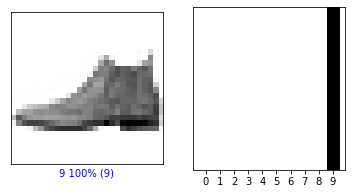

<Figure size 432x288 with 0 Axes>

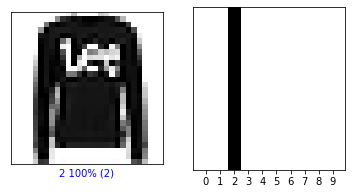

<Figure size 432x288 with 0 Axes>

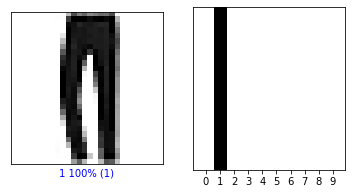

<Figure size 432x288 with 0 Axes>

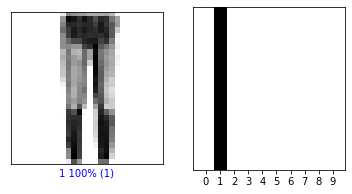

<Figure size 432x288 with 0 Axes>

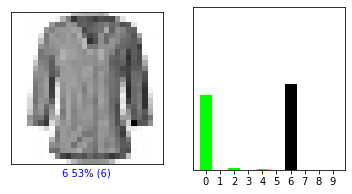

<Figure size 432x288 with 0 Axes>

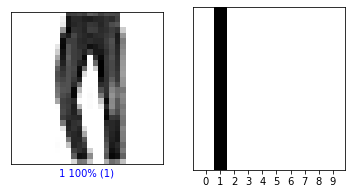

<Figure size 432x288 with 0 Axes>

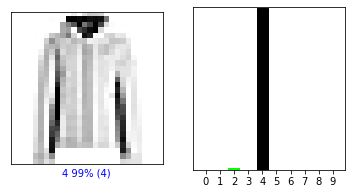

<Figure size 432x288 with 0 Axes>

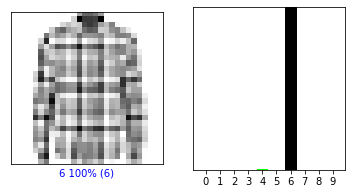

<Figure size 432x288 with 0 Axes>

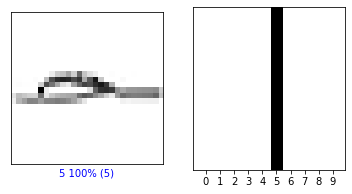

<Figure size 432x288 with 0 Axes>

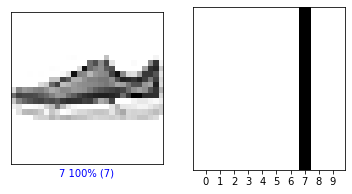

<Figure size 432x288 with 0 Axes>

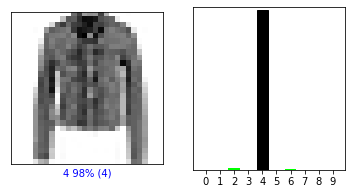

<Figure size 432x288 with 0 Axes>

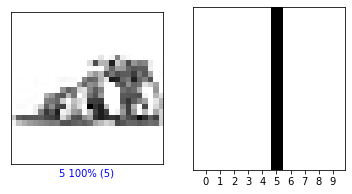

<Figure size 432x288 with 0 Axes>

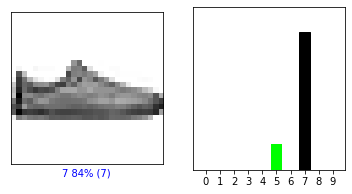

<Figure size 432x288 with 0 Axes>

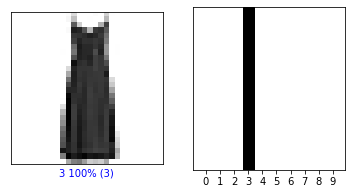

<Figure size 432x288 with 0 Axes>

In [ ]:

predictions= model2.predict(test_images)

for i in range(14):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

Comentarios sobre las imágenes:

El modelo clasifica correctamente todas las imágenes.

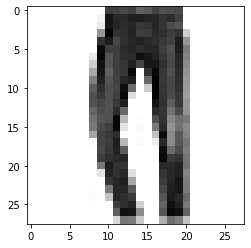

In [ ]:
# Veamos el sexto elemento
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

digit = test_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Generaremos una predicción sobre el sexto elemento.

In [ ]:

print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(predictions[5])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(np.argmax(predictions[5]))

=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
1


Clasifica correctamente el sexto elemento con un 100%.

*Conclusiones caso 3:*
En este caso hemos obtenido la precisión más alta y la pérdida más baja.

*Conclusiones en comparación a los datos de la Práctica 1:*

En la práctica 1, los resultados de precisión que hemos obtenido pueden llegar como mucho a un 89-90% aproximadamente. Sin embargo, si observamos los datos que hemos obtenido en la práctica 2; vemos que hemos llegado incluso a una precisión de un 94% aproximadamente.
Esto se debe a que las redes de neuronas convolucionales proporcionan buenos resultados en el reconocimiento de la imegen.Las capas convolucionales aprenden patrones locales en pequeñas ventanas, a diferencia de las Dense que aprenden patrones globales.

# Estudio del `batch_normalization`.

La normalización por lotes (Batch normalization) es una técnica que consiste en normalizar las activaciones de salida. Cuando se usa como optimizador el descenso de gradiente estocástisco,se normaliza los datos con la media y varianza de cada mini-lotede entrada.

In [ ]:
# Crear el Modelo de red neuronal CNN con:
from tensorflow.keras.layers import BatchNormalization, Activation
#Utilizaremos el modelo del caso 1
model = Sequential()
model.add(Conv2D(32,(5, 5),input_shape=(28, 28, 1)))
# metemos el BatchNormalization
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))


model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 4, 4, 64)       

In [ ]:
#Compilamos el modelo
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='sgd',
              metrics=['accuracy']) 
                                   

In [ ]:
# Entrenamos el modelo
model.fit(train_images, train_labels,epochs=5) 
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4812 - accuracy: 0.8298
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3365 - accuracy: 0.8803
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2957 - accuracy: 0.8955
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2693 - accuracy: 0.9043
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3117 - accuracy: 0.8905
Test accuracy: 0.890500009059906


Tras aplicar este parámetro, observamos que con respecto al caso 1 la pérdida ha disminuido (pérdida actual de un 25%) y la precisión ha aumentado (precisión actual 90%). Esto nos quiere decir que para el caso 1 sí puede ser una mejora en el entrenamiento.

# Estudio del `dropout`.

El método de Dropout trata de desactivar, de forma aleatoria, neuronas de la red neuronal.

Estas neuronas desactivadas no participan en el forwardpropagation ni el backwardpropagation, pues así las que siguen activas no dependen tanto de las que no. 

Se trata de evitar o reducir el sobreentrenamiento pues las neuronas aprenderán a trabajar más en solitario que en conjunto con el resto.

Puede comprender valores entre 0 y 1. Cuendo el valor tiende a 0 se activarían más neuronas, mientras que cuando tiende a 1 habrían más neuronas desactivadas. Si el valor es 0.5, se activarían el mismo número de neuronas desactivadas.

In [ ]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28,28,1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28,28,1))
test_images = test_images.astype('float32') / 255

validation_images=train_images[50000:]
validation_labels=train_labels[50000:]

train_images=train_images[0:49999]
train_labels=train_labels[0:49999]


In [ ]:
# Crear el Modelo de red neuronal CNN con:
from keras import layers

#Usaremos el mismo modelo que en el caso 2
model3= Sequential()

model3.add(Conv2D(64, (7, 7), activation='relu',input_shape=(28,28,1),padding='same'))
model3.add(MaxPooling2D((2, 2)))

model3.add(Conv2D(128, (3, 3), activation='relu',padding='same'))

model3.add(MaxPooling2D((2, 2)))

model3.add(Flatten())

model3.add(Dense(65, activation='relu'))
model3.add(layers.Dropout(0.2))
model3.add(Dense(10, activation='softmax'))

model3.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 6272)              0         
                                                                 
 dense_20 (Dense)            (None, 65)              

In [ ]:
#Compilamos el modelo
model3.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Ejecutamos el entrenamiento 
history=model3.fit(train_images,
                    train_labels,
                    epochs=30,
                    validation_data=(validation_images, validation_labels))
test_loss, test_acc = model3.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Epoch 1/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8781 - accuracy: 0.6835 - val_loss: 0.5677 - val_accuracy: 0.7861
Epoch 2/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5662 - accuracy: 0.7919 - val_loss: 0.4865 - val_accuracy: 0.8178
Epoch 3/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4896 - accuracy: 0.8212 - val_loss: 0.4506 - val_accuracy: 0.8295
Epoch 4/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4507 - accuracy: 0.8370 - val_loss: 0.4091 - val_accuracy: 0.8517
Epoch 5/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4225 - accuracy: 0.8468 - val_loss: 0.3943 - val_accuracy: 0.8609
Epoch 6/30
1563/1563 [==============================] - 9s 5ms/step - loss: 0.4009 - accuracy: 0.8569 - val_loss: 0.3891 - val_accuracy: 0.8560
Epoch 7/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3861 - accuracy: 0.8605 - val_loss: 0.3590 - val_accuracy:

In [ ]:
def pinta_perdida_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  epochs = range(1, len(acc) + 1)
  # "bo" es para "punto azun"
  plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
  # "b" es para "linea continua azul"
  plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [ ]:
def pinta_precision_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  plt.clf()   # Limpia la figura
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

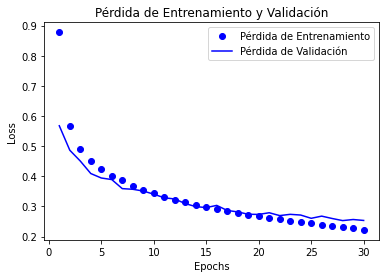

In [ ]:
pinta_perdida_entrenamiento_validacion(history)

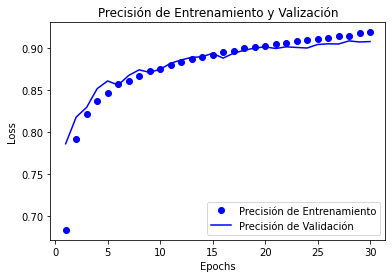

In [ ]:
pinta_precision_entrenamiento_validacion(history)

313/313 [==============================] - 1s 2ms/step


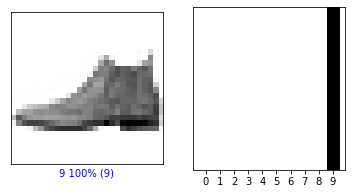

<Figure size 432x288 with 0 Axes>

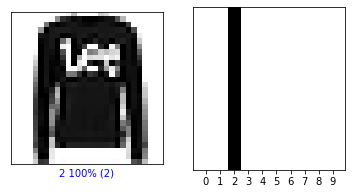

<Figure size 432x288 with 0 Axes>

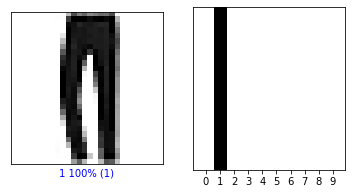

<Figure size 432x288 with 0 Axes>

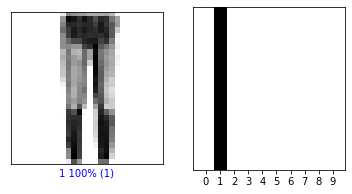

<Figure size 432x288 with 0 Axes>

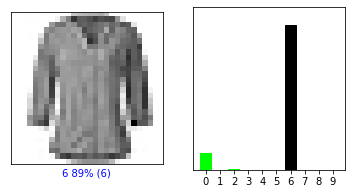

<Figure size 432x288 with 0 Axes>

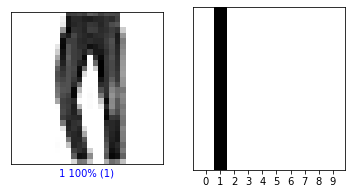

<Figure size 432x288 with 0 Axes>

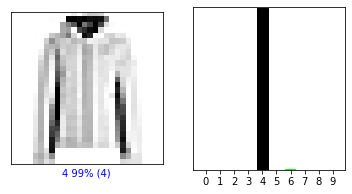

<Figure size 432x288 with 0 Axes>

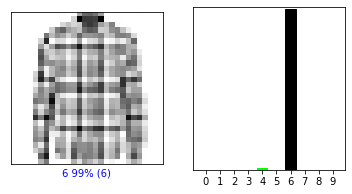

<Figure size 432x288 with 0 Axes>

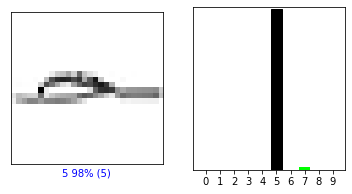

<Figure size 432x288 with 0 Axes>

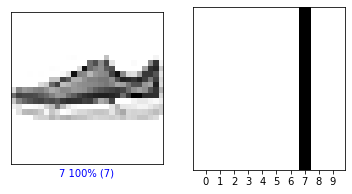

<Figure size 432x288 with 0 Axes>

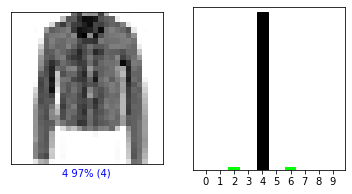

<Figure size 432x288 with 0 Axes>

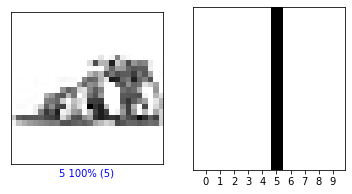

<Figure size 432x288 with 0 Axes>

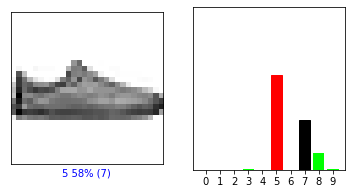

<Figure size 432x288 with 0 Axes>

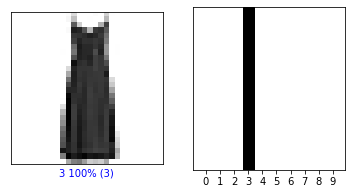

<Figure size 432x288 with 0 Axes>

In [ ]:
# graficamos los 14 primeros elementos para ver cómo de bien o de mal se comporta nuestro modelo.

predictions = model3.predict(test_images)

for i in range(14):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

En este caso, si lo empleamos en el caso 1, el modelo no cambia, sin embargo en el caso 2; como vemos en las gráficas, el modelo no se sobreentrena, aunque es cierto que la precisión ha aumentado con respecto al modelo sin el Dropout.

# Estudio de los conceptos de `callbacks`.

### Hiperparámetro Learning rate en caso 1 con 25 épocas

In [ ]:
# Crear el Modelo de red neuronal CNN con:
#Utilizaremos el modelo del caso 1:
model = Sequential()

model.add(Conv2D(32, (5, 5), activation='relu',input_shape=(28,28,1)))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (5, 5), activation='relu'))

model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 1024)              0         
                                                                 
 dense_21 (Dense)            (None, 10)              

In [ ]:
#Compilamos el modelo
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy']) 
                                    

In [ ]:
# Definimos la función scheduler que mantiene la tasa de aprendizaje durante las primeras 15 épocas y, a partir de ésta, decrece de forma exponencial
# A esta función entra la época en la que se está entrenando el modelo y la tasa de aprendizaje de la época anterior
def scheduler(epoch, lr):
  if epoch < 15:
    return lr
  else:
    return lr * tf.math.exp(-0.1)
    

El learning rate es un hiperparametro que indica la rapidez con la que aprende la red. Además, establece cómo de rápido pueden cambiar los hiperparámetros de un modelo segús éste va aprendiendo. En el caso de ser un valor muy pequeño hace que la red aprenda muy despacio y que pueda llegar a estancarse en un mínimo local y, por tanto, que los valores de los pesos y del bias no se modificaran correctamente. En caso contrario, si el valor de lr es muuy alto, el aprendizaje sería muy rápido pero habría sobreentrenamiento, ya que podría saltarse el valor del mínimo global. 



Es un hiperparámetro difícil de ajustar, pero es recomendable no usar un valor constante durante todo el entrenamiento y que, según va avanzando el proceso de entrenamiento, el valor del learning rate disminuya, es decir, que haya valores más grandes al principio y más pequeños al final.


In [ ]:
# Introducimos la función callbacks learning rate que tiene como entrada la tasa de aprendizaje 
callback = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)


In [ ]:
# Ejecutamos el entrenamiento 
# Introducimos la tasa de aprendizaje
model.fit(train_images, train_labels, epochs=25, callbacks=[callback])
#Verificamos el modelo ya entrenado contra el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)


Epoch 1: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 1/25
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8658 - accuracy: 0.6937 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 2/25
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5342 - accuracy: 0.8083 - lr: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 3/25
1563/1563 [==============================] - 5s 4ms/step - loss: 0.4673 - accuracy: 0.8333 - lr: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 4/25
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4300 - accuracy: 0.8485 - lr: 0.0100

Epoch 5: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 5/25
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4039 - accuracy: 0.8567 - lr: 0.0100

Epoch 6: LearningRateSchedule